In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud

In [2]:
c_plts = pd.read_csv("/Users/suzylau/Downloads/archive-3/consumer_complaints.csv")

/var/folders/66/qq6y4h9x2v91kpgp9hv1rh3r0000gn/T/ipykernel_17011/1850259472.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  c_plts = pd.read_csv("/Users/suzylau/Downloads/archive-3/consumer_complaints.csv")


In [3]:
c_plts.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
c_plts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [5]:
c_plts.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [9]:
c_plts['date_received'].dt.strftime("%y").unique().tolist()

['13', '14', '15', '16', '12', '11']

In [8]:
c_plts['date_received'] = pd.to_datetime(c_plts['date_received'])

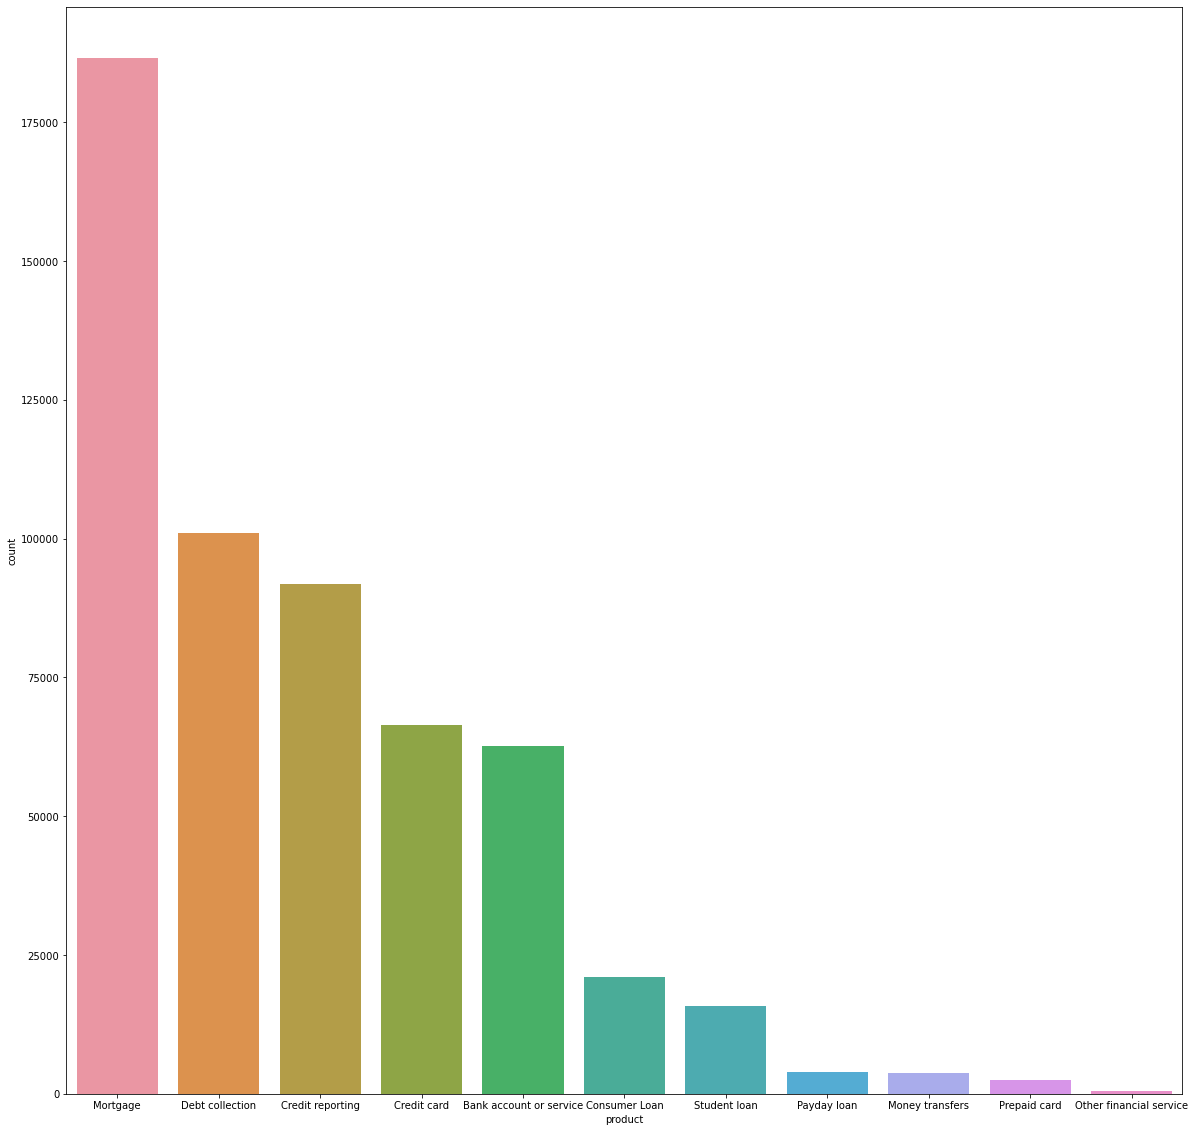

In [10]:
plt.figure(figsize=(20,20))

sns.countplot(x=c_plts["product"], data=c_plts, order=c_plts['product'].value_counts().index)
plt.show()

In [11]:
c_plts['company'].unique()

array(['U.S. Bancorp', 'Wells Fargo & Company', 'Navient Solutions, Inc.',
       ..., 'American Billing & Collection',
       'DEEP SOUTH FINANCIAL SERVICES INC.', 'ICUL Service Corporation'],
      dtype=object)

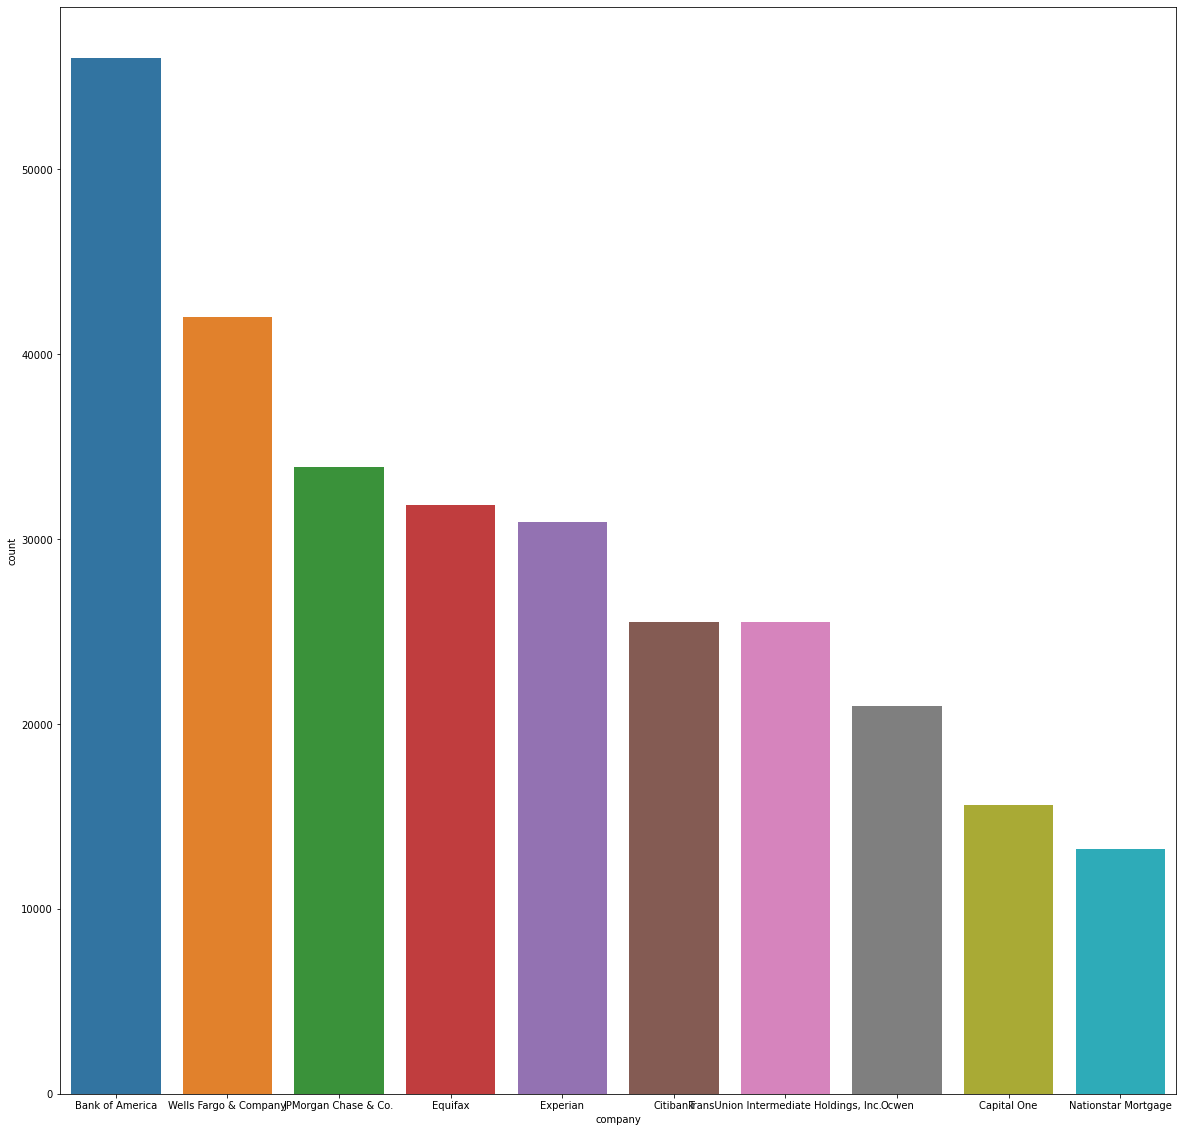

In [12]:
plt.figure(figsize=(20,20))

sns.countplot(x=c_plts["company"], data=c_plts, order=c_plts['company'].value_counts().iloc[:10].index)
plt.show()

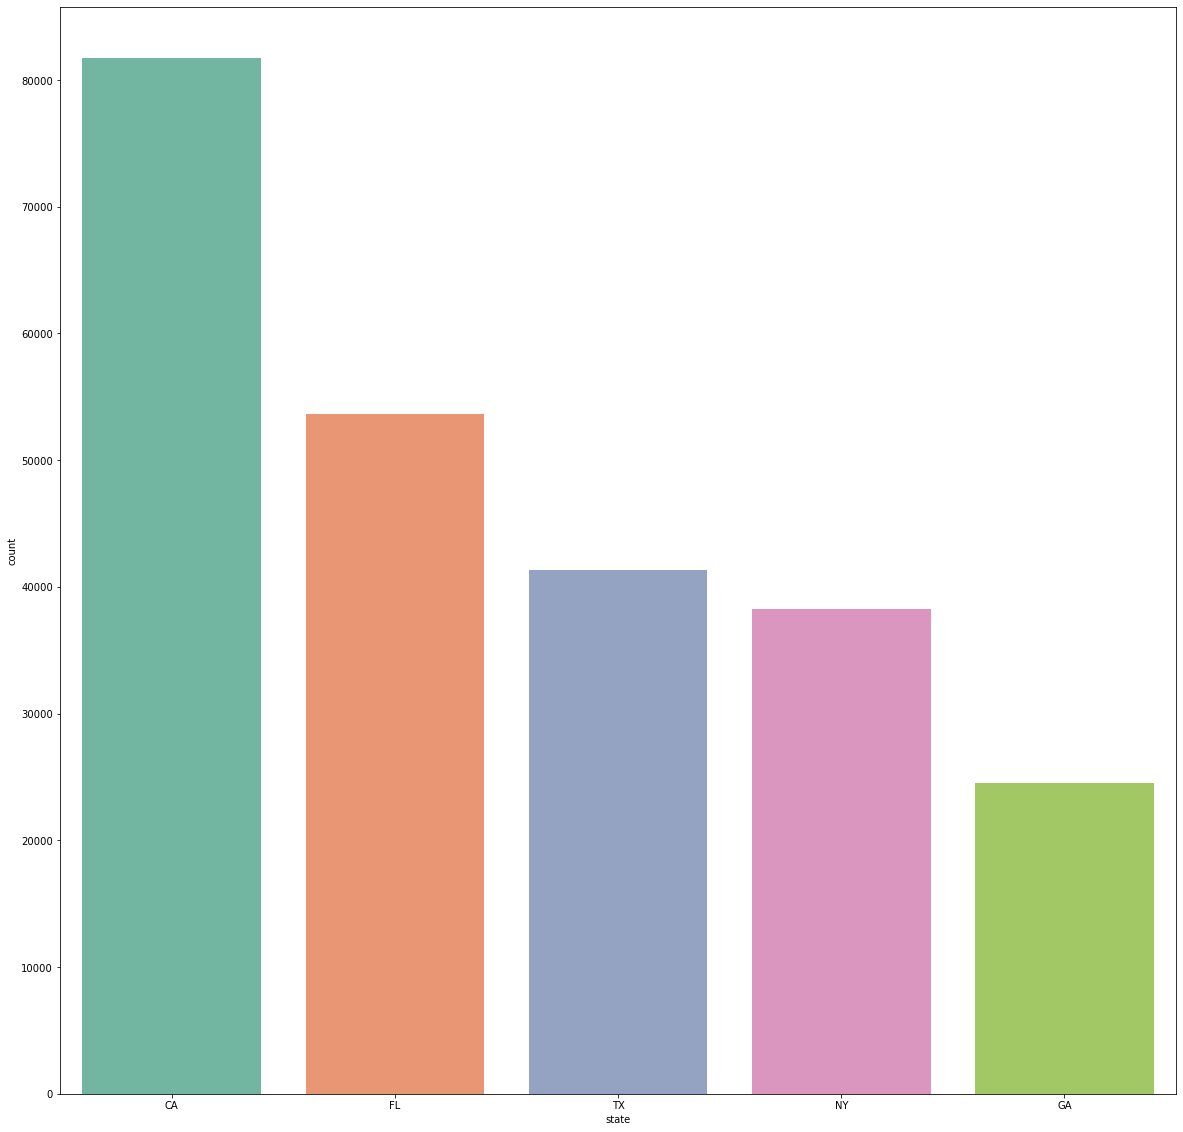

In [13]:
plt.figure(figsize=(20,20))

sns.countplot(x=c_plts["state"], data=c_plts,palette="Set2", order=c_plts['state'].value_counts().iloc[:5].index)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

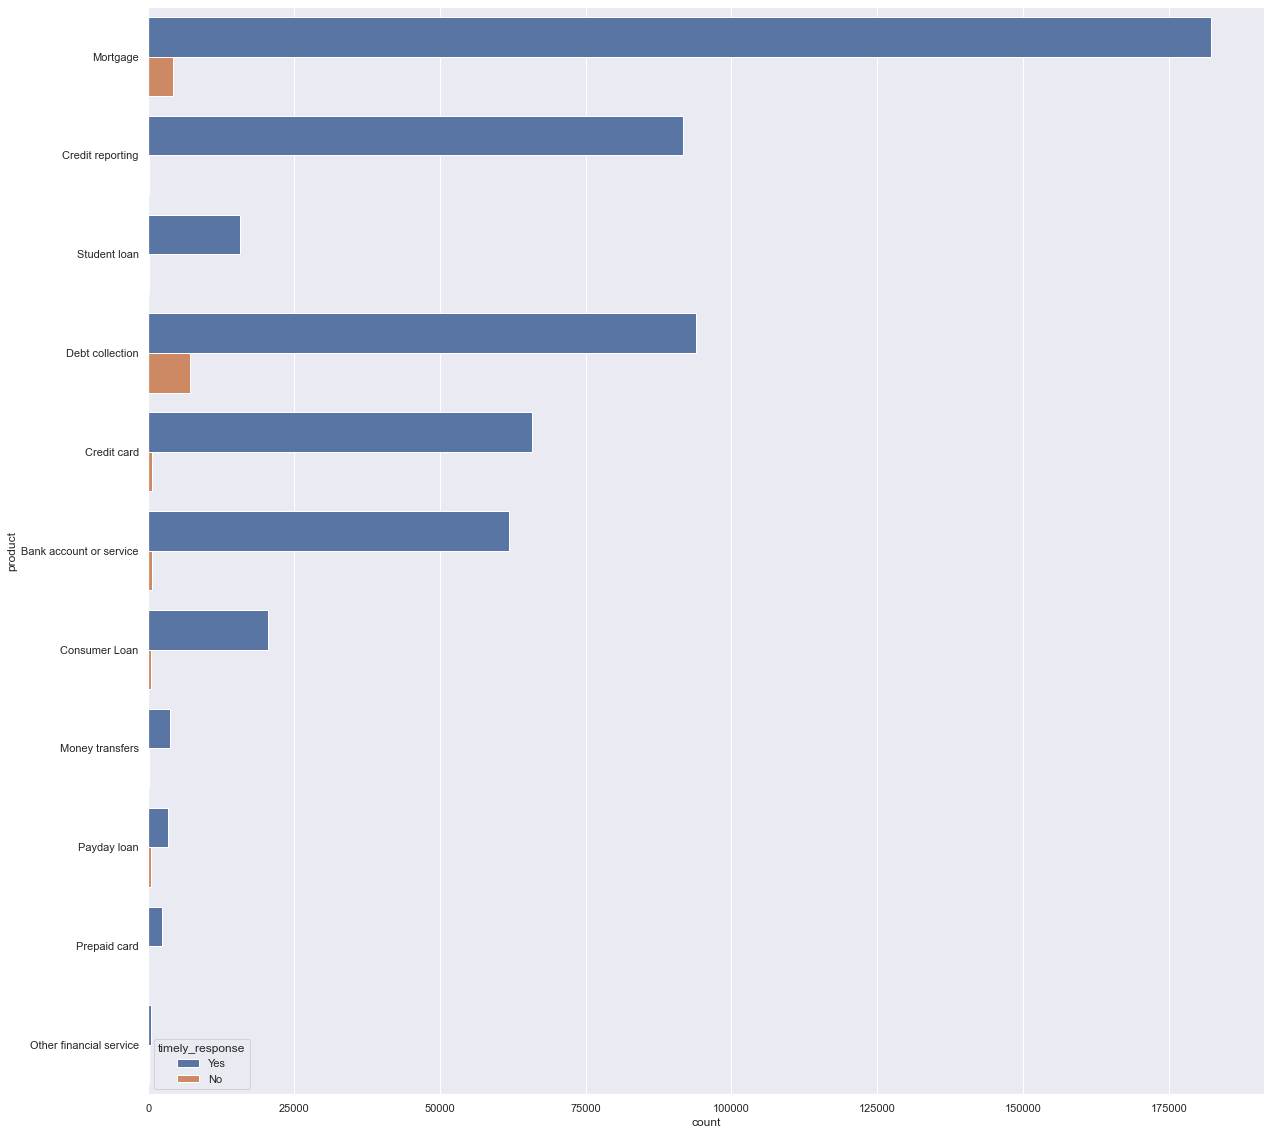

In [25]:
plt.figure(figsize=(20,20))
sns.countplot(y=c_plts['product'], hue=c_plts["timely_response"], data=c_plts)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1440 with 0 Axes>

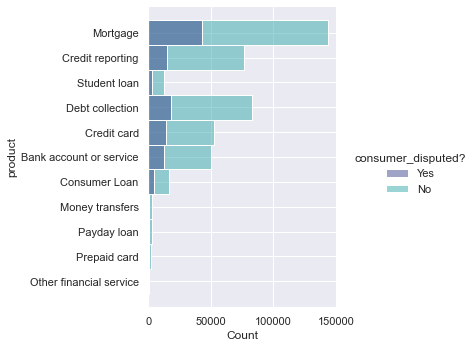

In [34]:
plt.figure(figsize=(20,20))
sns.displot(y=c_plts['product'], hue=c_plts["consumer_disputed?"], data=c_plts,palette = "mako")
plt.show

In [6]:
c_plts.date_received = pd.to_datetime(c_plts.date_received)
c_plts.date_sent_to_company = pd.to_datetime(c_plts.date_sent_to_company)

In [7]:
complaints2012 = c_plts[c_plts.date_received.dt.year==2012]
complaints2013 = c_plts[c_plts.date_received.dt.year==2013]
complaints2014 = c_plts[c_plts.date_received.dt.year==2014]
complaints2015 = c_plts[c_plts.date_received.dt.year==2015]
complaints2016 = c_plts[c_plts.date_received.dt.year==2016]

In [8]:
# Monthwise complaints for the Year 2012
Complaints_2012 = complaints2012.groupby(complaints2012.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2012['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2012.set_index('month',drop=True,inplace=True)
Complaints_2012.rename(columns={'complaint_id':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2013
Complaints_2013 = complaints2013.groupby(complaints2013.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2013['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2013.set_index('month',drop=True,inplace=True)
Complaints_2013.rename(columns={'complaint_id':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2014
Complaints_2014 = complaints2014.groupby(complaints2014.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2014['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2014.set_index('month',drop=True,inplace=True)
Complaints_2014.rename(columns={'complaint_id':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2015
Complaints_2015 = complaints2015.groupby(complaints2015.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2015['month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Complaints_2015.set_index('month',drop=True,inplace=True)
Complaints_2015.rename(columns={'complaint_id':'no_of_complaints'},inplace=True)

# Monthwise complaints for the Year 2016
Complaints_2016 = complaints2016.groupby(complaints2016.date_received.dt.month).agg({'complaint_id':'count'})
Complaints_2016['month'] = ['Jan','Feb','Mar','Apr']
Complaints_2016.set_index('month',drop=True,inplace=True)
Complaints_2016.rename(columns={'complaint_id':'no_of_complaints'},inplace=True)

print('Complaints for the Year 2012 :','\n',Complaints_2012)
print('Complaints for the Year 2013 :','\n',Complaints_2013)
print('\nComplaints for the Year 2014 :','\n',Complaints_2014)
print('\nComplaints for the Year 2015 :','\n',Complaints_2015)
print('\nComplaints for the Year 2016 :','\n',Complaints_2016)

Complaints for the Year 2012 : 
        no_of_complaints
month                  
Jan                3249
Feb                3518
Mar                6252
Apr                5712
May                7633
Jun                7866
Jul                6769
Aug                6894
Sep                5501
Oct                6746
Nov                6141
Dec                6242
Complaints for the Year 2013 : 
        no_of_complaints
month                  
Jan                9745
Feb                8350
Mar                8790
Apr                8636
May                8173
Jun                8039
Jul                9275
Aug                9571
Sep                9641
Oct                9245
Nov                9324
Dec                9484

Complaints for the Year 2014 : 
        no_of_complaints
month                  
Jan               12624
Feb               13054
Mar               13960
Apr               13853
May               12174
Jun               12528
Jul               13426
Aug         

Text(0.5, 1.0, 'Monthwise complaints trend')

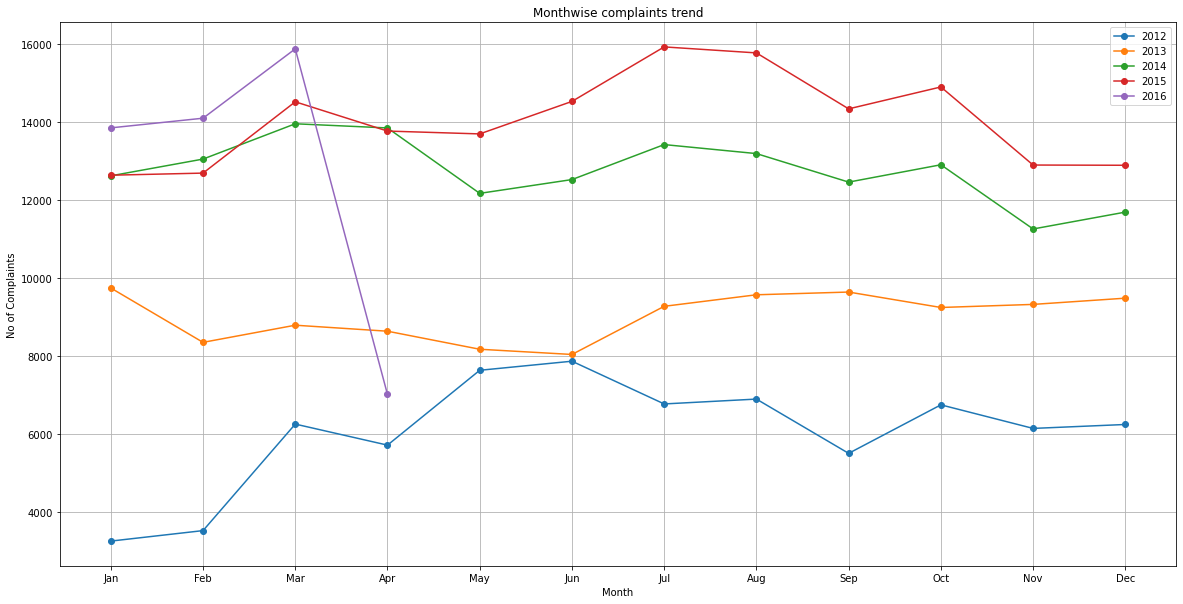

In [9]:
# Monthwise complaints trend for the year 2012,2013,2014,2015,2016
plt.figure(figsize=(20,10))
plt.plot(Complaints_2012,marker='o',label='2012')
plt.plot(Complaints_2013,marker='o',label='2013')
plt.plot(Complaints_2014,marker='o',label='2014')
plt.plot(Complaints_2015,marker='o',label='2015')
plt.plot(Complaints_2016,marker='o',label='2016')
plt.grid()
plt.xlabel('Month')
plt.ylabel('No of Complaints')
plt.legend(loc='upper right')
plt.title("Monthwise complaints trend")

Text(0.5, 1.0, 'Yearwise complaints')

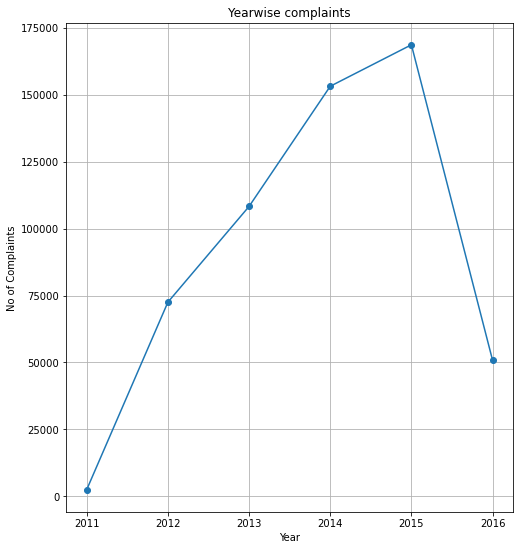

In [10]:
plt.figure(figsize=(8,9))
plt.plot(c_plts.groupby(c_plts['date_received'].dt.year).agg({'complaint_id':'count'}),marker='o')
plt.grid()
plt.xlabel('Year')
plt.ylabel('No of Complaints')
plt.title('Yearwise complaints')

In [14]:
c_plts['state'].unique()

array(['CA', 'NY', 'MD', 'GA', 'AZ', 'IL', 'NC', 'TX', 'DC', 'KY', 'RI',
       'TN', 'AR', 'AL', 'NJ', 'VA', 'FL', 'MN', 'AK', 'OH', 'OR', 'MO',
       'LA', 'SC', 'OK', 'WA', 'PA', 'MI', 'CO', 'KS', 'MA', 'NH', 'NV',
       'WV', 'PR', 'DE', 'IN', 'UT', 'ME', 'NE', 'NM', 'WY', 'CT', 'HI',
       'ID', nan, 'MS', 'WI', 'IA', 'MT', 'MH', 'VT', 'AE', 'SD', 'FM',
       'VI', 'ND', 'GU', 'MP', 'AP', 'AS', 'PW', 'AA'], dtype=object)

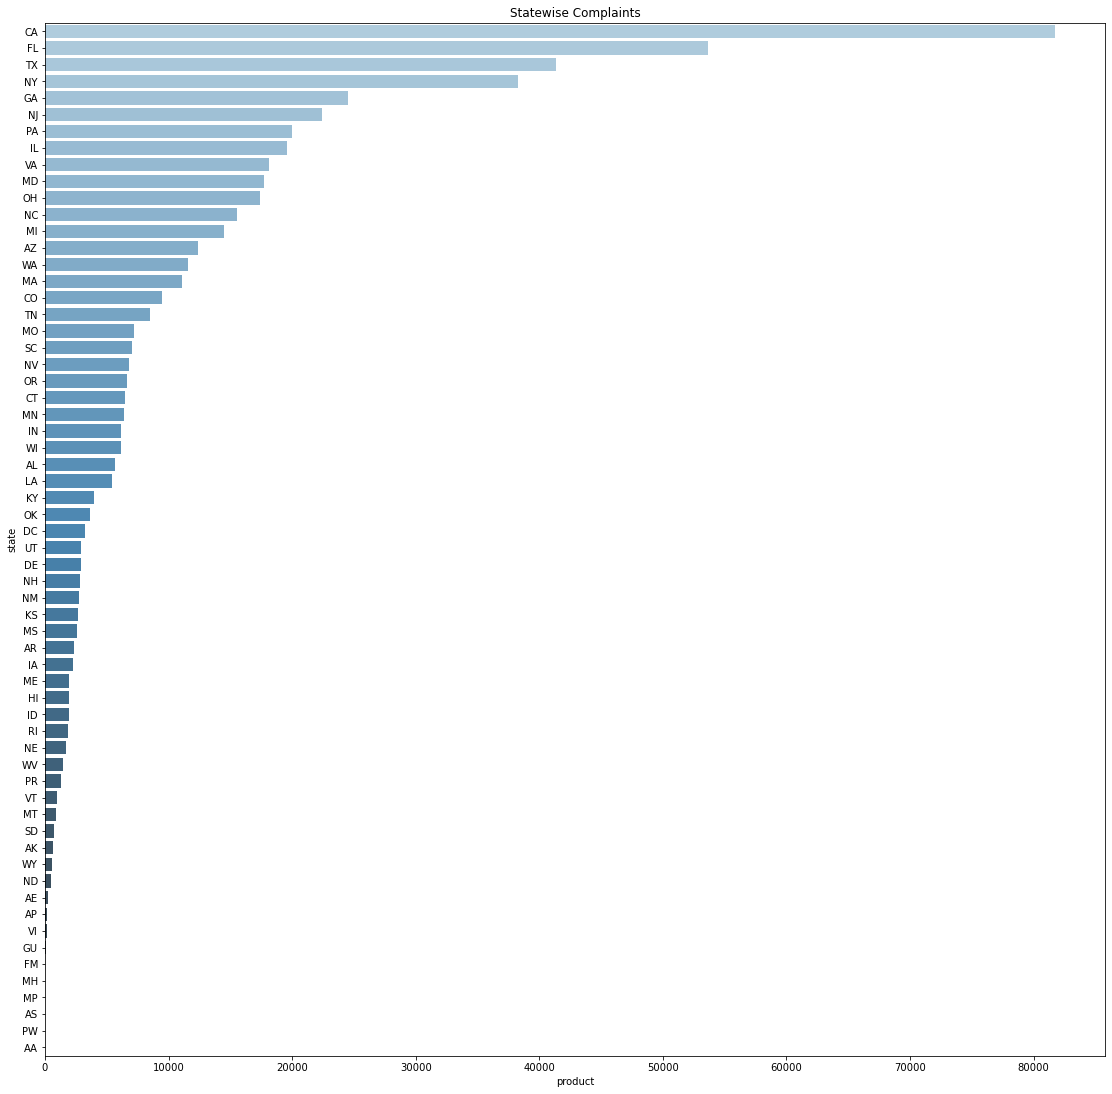

In [11]:
complaints1 = c_plts.groupby("state")[["product"]].agg('count') 
complaints1 = complaints1.sort_values("product", ascending=False)

# ploting statewise product usage
plt.figure(figsize=(19,19))
sns.barplot(x="product", y=complaints1.index, data=complaints1, palette="Blues_d") 
plt.title("Statewise Complaints")
plt.show()

<AxesSubplot:>

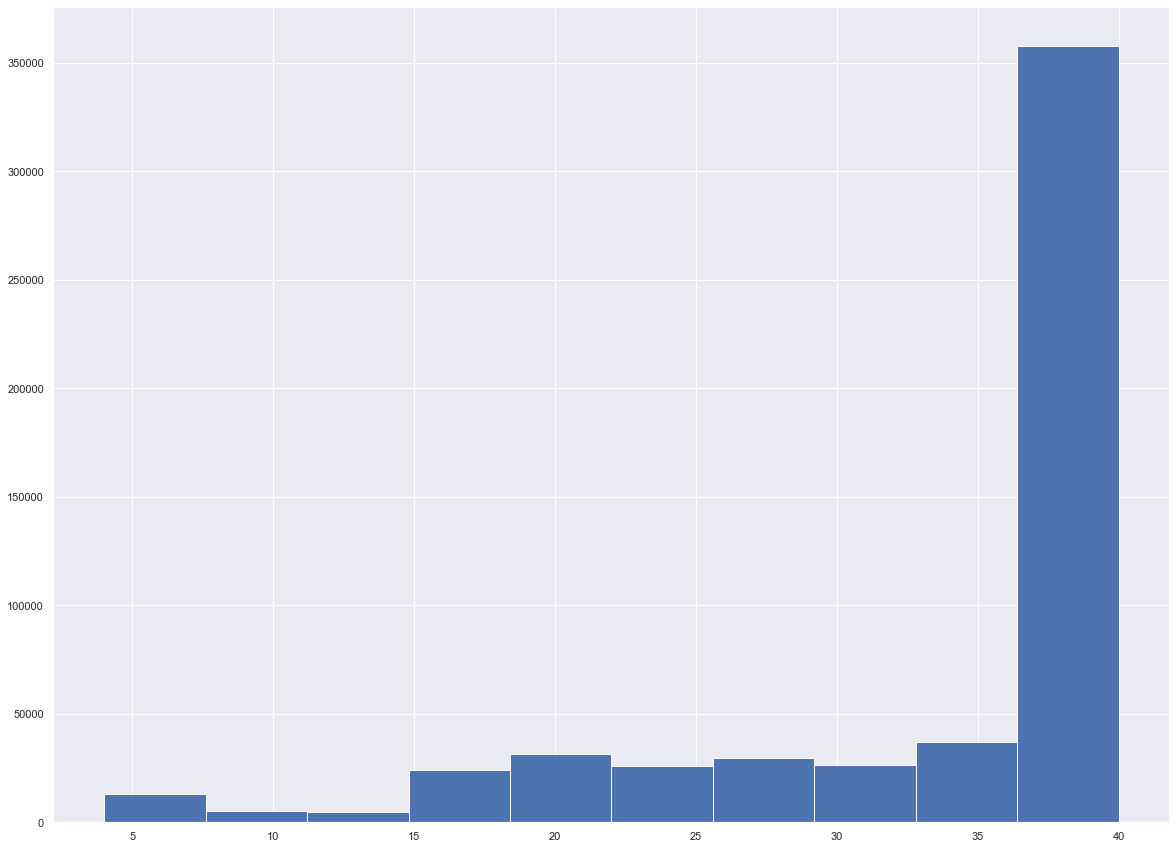

In [36]:
##Take a look at the number of characters present in each sentence.
c_plts['issue'].str.len().hist()

In [12]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suzylau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
import contractions, re
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('wordnet')

porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_tokenization(text):
    return tokenizer.tokenize(text)
   
def clean_punct(text):
    text = re.sub(r'\w+', ' ', text)
    return text

def remove_numbers(text):
    text = re.sub(r"\b\d+\b *|\b[a-z]\b *", ' ', text)
    return text
    
def remove_single_char(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

def remove_stopw(text):
    if text not in stop:
        return text

[nltk_data] Downloading package wordnet to /Users/suzylau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
def nlp_pre(data):
    
    temp = []
    
    character_text = data.tolist()
    character_text = [j for i in character_text for j in i.split(" ") ]
    character_text = ' '.join(character_text)

    #Lower Case
    tokens = character_text.lower()
    
    #Expand Contractions
    tokens = contractions.fix(tokens) 
    
    #Remove numbers and special characters
    tokens = remove_numbers(tokens)
    tokens = remove_single_char(tokens)
        
    #Tokenization
    tokens = clean_tokenization(tokens)
        
    #Lemmatization
    tokens = [lemmatizer.lemmatize(word = x, pos='v') for x in tokens]
    tokens = [lemmatizer.lemmatize(word = x, pos='n') for x in tokens]

    #Stemming
    tokens = [porter_stemmer.stem(word = x) for x in tokens]

    #Remove Stopwords
    tokens = [remove_stopw(x) for x in tokens]
    
    #Remove None value
    for i in tokens:
         if i != None and i!= ' ':
            temp.append(i)  
            
    tokens = temp.copy()
    
    return tokens

In [16]:
issue_token = nlp_pre(c_plts.issue)

In [17]:
issue_token[:10]

['loan',
 'modif',
 'collect',
 'foreclosur',
 'loan',
 'servic',
 'payment',
 'escrow',
 'account',
 'incorrect']

### Word Frequency

In [21]:
from nltk import FreqDist

def most_common (token, num):
    token_freq = FreqDist(token)
    top = token_freq.most_common(num)
    return top

In [22]:
top_words = most_common(issue_token, 100)

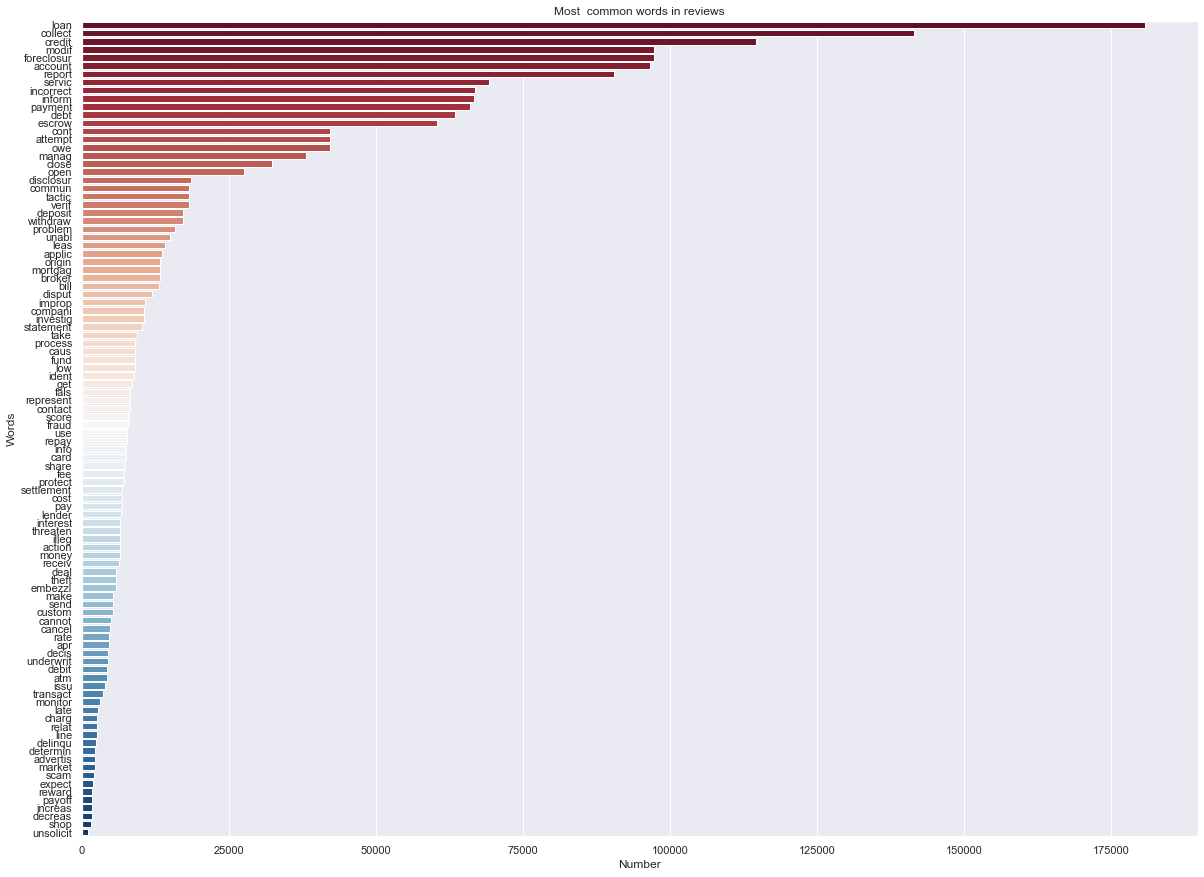

In [23]:
sns.set(rc={'figure.figsize':(20,15)})

sns.barplot(x = [x[1] for x in top_words],
            y = [x[0] for x in top_words],
            palette = 'RdBu')

plt.xlabel('Number')
plt.ylabel('Words')
plt.title('Most  common words in reviews')
plt.show()

In [28]:
c_plts['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [32]:
c_plts['issue'].value_counts(ascending=False)

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender sold the property                        5
Lender damaged or destroyed vehicle             5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [18]:
!{sys.executable} -m pip install wordcloud

zsh:1: parse error near `-m'


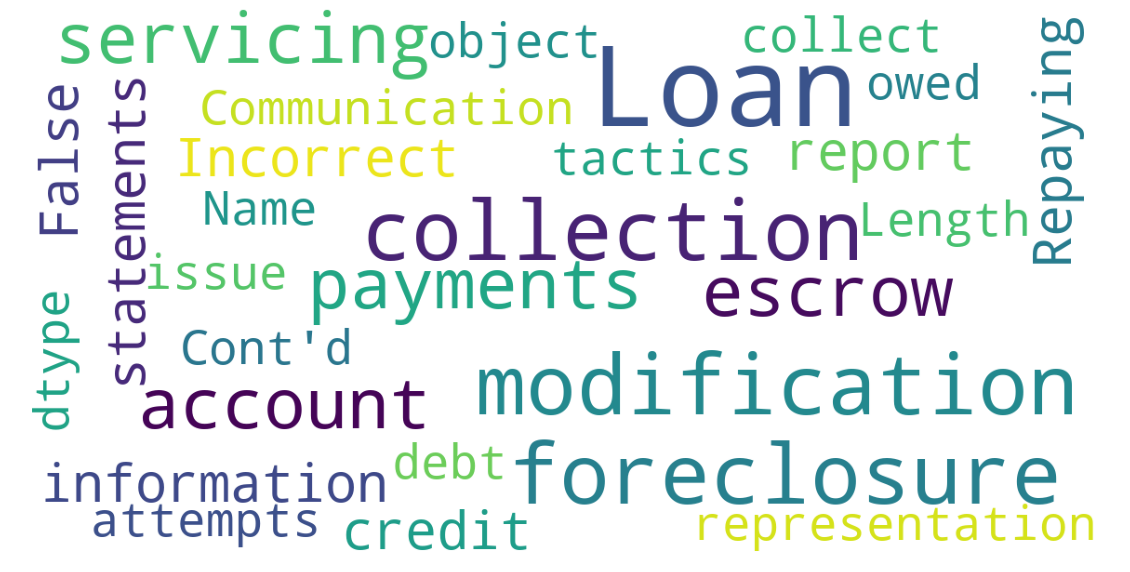

In [20]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)

def wc(data,title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
wc(c_plts['issue'])

## Word to vector

In [22]:
import random
random_index = random.randint(0, len(c_plts)-5)
for row in c_plts[["issue"]][random_index:random_index+5].itertuples():
  _, issue = row 
  print(f"issue:\n{issue}\n")

issue:
Loan servicing, payments, escrow account

issue:
Loan servicing, payments, escrow account

issue:
Credit decision / Underwriting

issue:
Loan modification,collection,foreclosure

issue:
Problems caused by my funds being low



In [23]:
sentences = c_plts['issue'].to_numpy()

In [24]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace",
                                    ngrams=None, 
                                    output_mode="int", 
                                    output_sequence_length=None)

Metal device set to: Apple M1


2022-10-02 18:20:36.061422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-02 18:20:36.061543: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [25]:
max_vocab_length = 10000 
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [26]:
text_vectorizer.adapt(sentences)

2022-10-02 18:21:00.941127: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-02 18:21:01.009447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [27]:
random_sentence = random.choice(sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Deposits and withdrawals      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[31, 23, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>